1. Import Required Libraries

In [93]:
# Core Libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, PowerTransformer
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import VarianceThreshold

# AutoEDA
import sweetviz
import dtale
from pandas_profiling import ProfileReport

2. Load Dataset

In [96]:
df = pd.read_csv(r"C:\Users\moham\Downloads\Data_Set_WT.csv")
df.columns = df.columns.str.strip()  # remove whitespace

3. Basic Info

In [99]:
print(df.shape)

(3600, 16)


In [101]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600 entries, 0 to 3599
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   date                           3600 non-null   object 
 1   Wind_speed                     3600 non-null   float64
 2   Power                          3600 non-null   float64
 3   Nacelle_ambient_temperature    3600 non-null   float64
 4   Generator_bearing_temperature  3600 non-null   float64
 5   Gear_oil_temperature           3600 non-null   float64
 6   Ambient_temperature            3600 non-null   float64
 7   Rotor_Speed                    3600 non-null   float64
 8   Nacelle_temperature            3600 non-null   float64
 9   Bearing_temperature)           3600 non-null   float64
 10  Generator_speed                3600 non-null   float64
 11  Yaw_angle                      3600 non-null   float64
 12  Wind_direction                 3600 non-null   f

In [103]:
df.head()

,date,Wind_speed,Power,Nacelle_ambient_temperature,Generator_bearing_temperature,Gear_oil_temperature,Ambient_temperature,Rotor_Speed,Nacelle_temperature,Bearing_temperature),Generator_speed,Yaw_angle,Wind_direction,Wheel_hub_temperature,Gear_box_inlet_temperature,Failure_status
0,2023-02-01,7.799746,2.294532,32.478243,85.596520,64.418706,34.690590,138.171939,58.154396,102.000000,1441.457209,14.321691,7.226060,12.649671,17.413726,No_failure
1,2023-04-29,43.441611,0.773574,-55.547015,59.187505,100.447116,-18.129465,24.924208,-5.029160,39.811354,358.359652,97.373927,147.070099,-75.409575,27.806414,Failure
2,2023-07-27,14.073105,2.071047,39.680000,80.242633,49.515000,29.550796,138.487406,44.565287,95.850662,1388.939832,14.770060,208.262689,62.468350,13.662392,No_failure
3,2023-06-05,41.162919,0.148410,-53.617603,46.304320,111.135974,-2.860951,24.471474,8.002850,16.072333,514.833604,164.625803,217.182933,-73.739098,21.769295,Failure
4,2023-05-26,18.876468,2.946286,12.629549,88.603457,83.707096,41.200000,114.508950,49.652406,71.400000,1156.208237,13.406563,32.355579,7.236546,11.193650,No_failure


4. Central Tendency: Mean, Median, Mode

In [105]:
# Mean
df.mean(numeric_only=True)

Wind_speed                         16.391655
Power                               3.313057
Nacelle_ambient_temperature        11.441843
Generator_bearing_temperature      84.070038
Gear_oil_temperature               84.278844
Ambient_temperature                17.776200
Rotor_Speed                       193.357513
Nacelle_temperature                46.459032
Bearing_temperature)               83.034985
Generator_speed                  1394.994073
Yaw_angle                          49.232251
Wind_direction                     61.240340
Wheel_hub_temperature              19.973850
Gear_box_inlet_temperature         29.804650
dtype: float64

In [106]:
# Median
df.median(numeric_only=True)

Wind_speed                         13.871383
Power                               2.697724
Nacelle_ambient_temperature         9.766350
Generator_bearing_temperature      83.107151
Gear_oil_temperature               76.969935
Ambient_temperature                10.254226
Rotor_Speed                       184.220736
Nacelle_temperature                46.636309
Bearing_temperature)               71.400000
Generator_speed                  1388.872525
Yaw_angle                          17.896149
Wind_direction                     37.307107
Wheel_hub_temperature              20.278185
Gear_box_inlet_temperature         16.794689
dtype: float64

5. Mode for Categorical Columns Only

In [111]:
# Select only categorical columns
categorical_cols = df.select_dtypes(include=['object'])

# Calculate mode for each categorical column
categorical_mode = categorical_cols.mode().iloc[0]

# Display results
categorical_mode

date              2023-01-01
Failure_status    No_failure
Name: 0, dtype: object

6. Dispersion: Standard Deviation, Variance, Range

In [114]:
# Standard Deviation
df.std(numeric_only=True)

Wind_speed                        13.203737
Power                              2.611270
Nacelle_ambient_temperature       43.560698
Generator_bearing_temperature     28.291756
Gear_oil_temperature              23.012128
Ambient_temperature               29.922620
Rotor_Speed                      126.614608
Nacelle_temperature               26.619685
Bearing_temperature)              31.273782
Generator_speed                  550.181236
Yaw_angle                         55.879599
Wind_direction                   109.467023
Wheel_hub_temperature             57.377756
Gear_box_inlet_temperature        29.917515
dtype: float64

In [116]:
# Variance
df.var(numeric_only=True)

Wind_speed                          174.338667
Power                                 6.818734
Nacelle_ambient_temperature        1897.534399
Generator_bearing_temperature       800.423470
Gear_oil_temperature                529.558052
Ambient_temperature                 895.363200
Rotor_Speed                       16031.259010
Nacelle_temperature                 708.607621
Bearing_temperature)                978.049436
Generator_speed                  302699.392075
Yaw_angle                          3122.529532
Wind_direction                    11983.029156
Wheel_hub_temperature              3292.206881
Gear_box_inlet_temperature          895.057708
dtype: float64

In [118]:
# Range = Max - Min
df_range = df.max(numeric_only=True) - df.min(numeric_only=True)
df_range

Wind_speed                         59.107509
Power                              11.884147
Nacelle_ambient_temperature       551.575262
Generator_bearing_temperature     133.641030
Gear_oil_temperature               79.208582
Ambient_temperature               108.141047
Rotor_Speed                       463.054936
Nacelle_temperature               142.144741
Bearing_temperature)              142.727613
Generator_speed                  3963.618966
Yaw_angle                         178.519794
Wind_direction                   1045.380106
Wheel_hub_temperature             208.352613
Gear_box_inlet_temperature        118.801753
dtype: float64

7. Skewness & Kurtosis

In [121]:
# Skewness (3rd moment)
df.skew(numeric_only=True)

Wind_speed                       0.807180
Power                            1.603247
Nacelle_ambient_temperature      0.931590
Generator_bearing_temperature   -0.127518
Gear_oil_temperature             0.431929
Ambient_temperature              0.899107
Rotor_Speed                      0.379156
Nacelle_temperature             -0.170968
Bearing_temperature)             0.077462
Generator_speed                  0.091799
Yaw_angle                        0.972017
Wind_direction                   0.942656
Wheel_hub_temperature           -0.057501
Gear_box_inlet_temperature       1.856439
dtype: float64

In [123]:
# Kurtosis (4th moment)
df.kurtosis(numeric_only=True)

Wind_speed                      -0.366081
Power                            2.104039
Nacelle_ambient_temperature      4.691112
Generator_bearing_temperature    0.394212
Gear_oil_temperature            -1.137125
Ambient_temperature             -0.216913
Rotor_Speed                     -0.704868
Nacelle_temperature              0.253713
Bearing_temperature)            -0.121844
Generator_speed                  0.002416
Yaw_angle                       -0.563952
Wind_direction                   3.972304
Wheel_hub_temperature           -0.883290
Gear_box_inlet_temperature       1.836646
dtype: float64

8. Combine All in a Summary Table

In [126]:
summary_stats = pd.DataFrame({
    "Mean": df.mean(numeric_only=True),
    "Median": df.median(numeric_only=True),
    "Std Dev": df.std(numeric_only=True),
    "Variance": df.var(numeric_only=True),
    "Range": df.max(numeric_only=True) - df.min(numeric_only=True),
    "Skewness": df.skew(numeric_only=True),
    "Kurtosis": df.kurtosis(numeric_only=True)
})
summary_stats

,Mean,Median,Std Dev,Variance,Range,Skewness,Kurtosis
Wind_speed,16.391655,13.871383,13.203737,174.338667,59.107509,0.807180,-0.366081
Power,3.313057,2.697724,2.611270,6.818734,11.884147,1.603247,2.104039
Nacelle_ambient_temperature,11.441843,9.766350,43.560698,1897.534399,551.575262,0.931590,4.691112
Generator_bearing_temperature,84.070038,83.107151,28.291756,800.423470,133.641030,-0.127518,0.394212
Gear_oil_temperature,84.278844,76.969935,23.012128,529.558052,79.208582,0.431929,-1.137125
Ambient_temperature,17.776200,10.254226,29.922620,895.363200,108.141047,0.899107,-0.216913
Rotor_Speed,193.357513,184.220736,126.614608,16031.259010,463.054936,0.379156,-0.704868
Nacelle_temperature,46.459032,46.636309,26.619685,708.607621,142.144741,-0.170968,0.253713
Bearing_temperature),83.034985,71.400000,31.273782,978.049436,142.727613,0.077462,-0.121844
Generator_speed,1394.994073,1388.872525,550.181236,302699.392075,3963.618966,0.091799,0.002416


9. Missing Values

In [129]:
df.isnull().sum()

date                             0
Wind_speed                       0
Power                            0
Nacelle_ambient_temperature      0
Generator_bearing_temperature    0
Gear_oil_temperature             0
Ambient_temperature              0
Rotor_Speed                      0
Nacelle_temperature              0
Bearing_temperature)             0
Generator_speed                  0
Yaw_angle                        0
Wind_direction                   0
Wheel_hub_temperature            0
Gear_box_inlet_temperature       0
Failure_status                   0
dtype: int64

10. Outlier Detection & Handling (IQR Method)

In [132]:
numerical_cols = df.select_dtypes(include=[np.number]).columns

Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# A boolean DataFrame indicating True for values that are outliers
outliers = ((df[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 + 1.5 * IQR)))

# Count total outliers per column
outlier_counts = outliers.sum().sort_values(ascending=False)
print("🔹 Number of outliers per numerical column:")
print(outlier_counts)

🔹 Number of outliers per numerical column:
Power                            1037
Nacelle_ambient_temperature       722
Generator_bearing_temperature     637
Nacelle_temperature               613
Gear_box_inlet_temperature        600
Wind_direction                    444
Bearing_temperature)              261
Ambient_temperature               123
Generator_speed                    67
Wind_speed                          5
Gear_oil_temperature                0
Rotor_Speed                         0
Yaw_angle                           0
Wheel_hub_temperature               0
dtype: int64


In [134]:
# Remove Outliers
df_clean = df[~((df[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [136]:
numerical_cols = df_clean.select_dtypes(include=[np.number]).columns

Q1 = df_clean[numerical_cols].quantile(0.25)
Q3 = df_clean[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# A boolean DataFrame indicating True for values that are outliers
outliers = ((df_clean[numerical_cols] < (Q1 - 1.5 * IQR)) | (df_clean[numerical_cols] > (Q3 + 1.5 * IQR)))

# Count total outliers per column
outlier_counts = outliers.sum().sort_values(ascending=False)
print("🔹 Number of outliers per numerical column:")
print(outlier_counts)

🔹 Number of outliers per numerical column:
Yaw_angle                        110
Wind_direction                    96
Wind_speed                        15
Gear_box_inlet_temperature        10
Power                              8
Nacelle_ambient_temperature        8
Gear_oil_temperature               8
Generator_speed                    8
Nacelle_temperature                5
Generator_bearing_temperature      1
Wheel_hub_temperature              1
Ambient_temperature                0
Rotor_Speed                        0
Bearing_temperature)               0
dtype: int64


11. Discretization (Binning)

In [139]:
df_clean = df_clean.copy() 

bins = [0, 10, 25, df_clean['Wind_speed'].max()]
labels = ['Low', 'Medium', 'High']

df_clean.loc[:, 'Wind_speed_bin'] = pd.cut(df_clean['Wind_speed'], bins=bins, labels=labels, include_lowest=True)

12. Feature Construction

In [142]:
df_clean.loc[:, 'Temp_Diff'] = df_clean['Nacelle_temperature'] - df_clean['Ambient_temperature']
df_clean.loc[:, 'Speed_Diff'] = df_clean['Generator_speed'] - df_clean['Rotor_Speed']

13. Visualizations

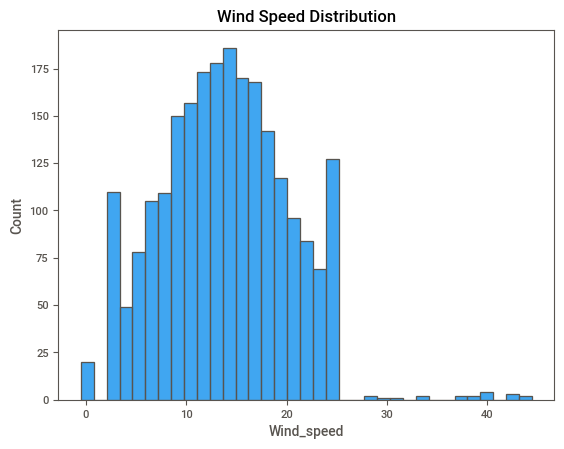

In [145]:
# Histogram
sns.histplot(df_clean['Wind_speed'], kde=False)
plt.title("Wind Speed Distribution")
plt.show()

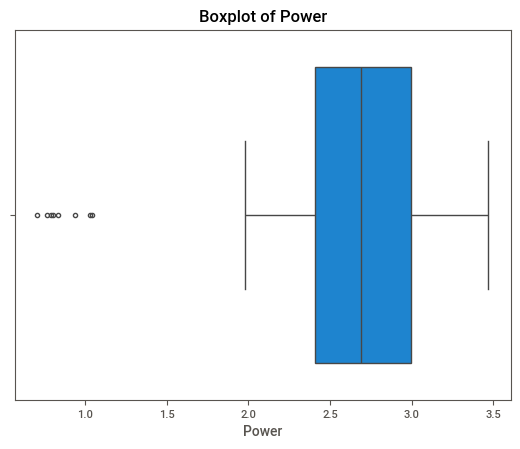

In [147]:
# Boxplot for outlier check
sns.boxplot(x=df_clean['Power'])
plt.title("Boxplot of Power")
plt.show()

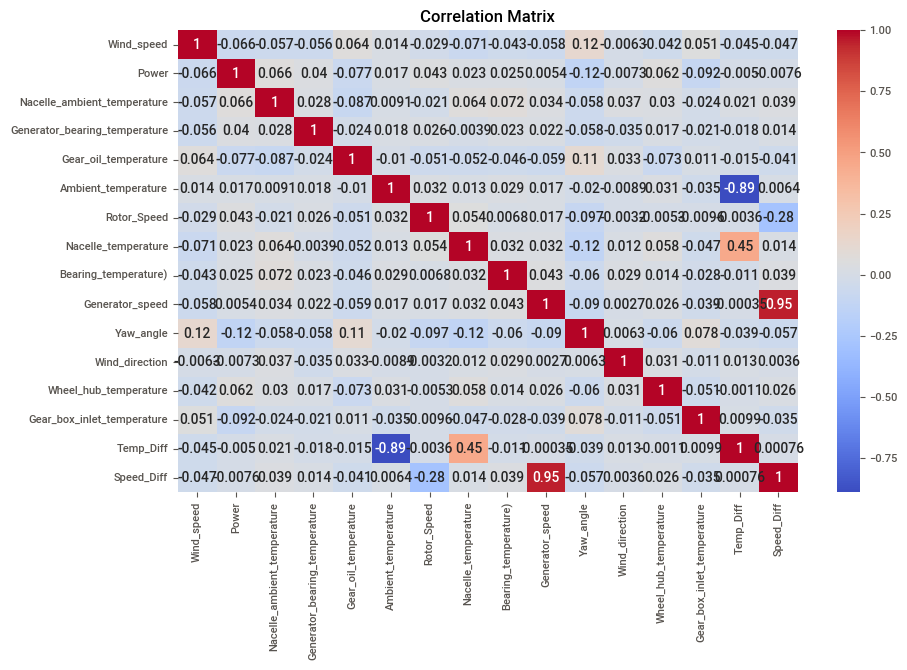

In [149]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df_clean.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

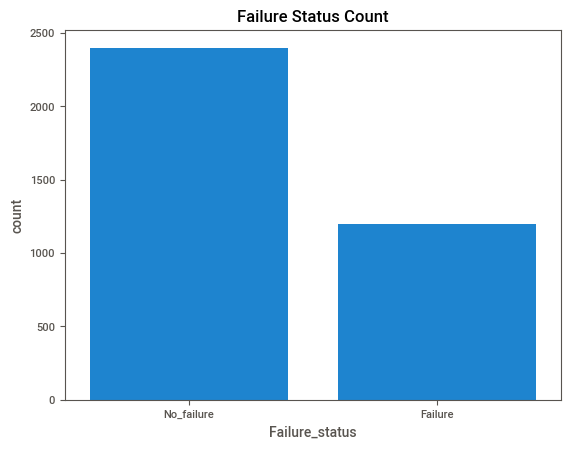

In [151]:
sns.countplot(x='Failure_status', data=df)
plt.title('Failure Status Count')
plt.show()

14. Zero/Near-Zero Variance Detection

In [154]:
sel = VarianceThreshold(threshold=0.01)
sel.fit(df_clean.select_dtypes(include=[np.number]))
df_var_filtered = df_clean[df_clean.select_dtypes(include=[np.number]).columns[sel.get_support()]]

 15. Feature Scaling


In [157]:
scaler = StandardScaler()
scaled = scaler.fit_transform(df_var_filtered.select_dtypes(include=[np.number]))
df_scaled = pd.DataFrame(scaled, columns=df_var_filtered.select_dtypes(include=[np.number]).columns)

16. AutoEDA Reports 

In [160]:
import sweetviz as sv
report = sv.analyze(df)
report.show_html("sweetviz_report.html")

                                             |                                             | [  0%]   00:00 ->…

Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [164]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df)
profile.to_file("pandas_profiling.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [166]:
import dtale
dtale.show(df)

17. Save Cleaned Dataset

In [175]:
df.to_csv(r"C:\Users\moham\OneDrive\Documents\project 2\cleaned_wind_turbine_data.csv", index=False)